In [2]:
import glob
import cv2
import numpy as np

from PIL import Image

{595: 0, 571: 10, 546: 20, 524: 30, 500: 40, 474: 50, 449: 60, 422: 70, 394: 80, 364: 90, 335: 100, 306: 110, 277: 120, 247: 130, 215: 140, 183: 150, 150: 160, 116: 170, 81: 180, 46: 190}
bottom/2022/03/01/2022-03-01T11:31:08+0000.jpg
545
546 524 20
current height: 20.454545454545453
bottom/2022/03/01/2022-03-01T11:41:09+0000.jpg
545
546 524 20
current height: 20.454545454545453
bottom/2022/03/01/2022-03-01T11:51:11+0000.jpg
545
546 524 20
current height: 20.454545454545453
bottom/2022/03/01/2022-03-01T12:01:13+0000.jpg
546
current height: 20
bottom/2022/03/01/2022-03-01T12:11:14+0000.jpg
546
current height: 20
bottom/2022/03/01/2022-03-01T12:21:16+0000.jpg
546
current height: 20
bottom/2022/03/01/2022-03-01T12:31:18+0000.jpg
546
current height: 20
bottom/2022/03/01/2022-03-01T12:41:20+0000.jpg
546
current height: 20
bottom/2022/03/01/2022-03-01T12:51:22+0000.jpg
546
current height: 20
bottom/2022/03/01/2022-03-01T13:01:24+0000.jpg
545
546 524 20
current height: 20.454545454545453
bott

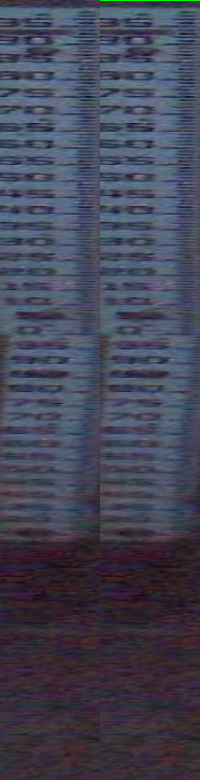

bottom/2022/03/01/2022-03-01T23:23:25+0000.jpg
0
too dark


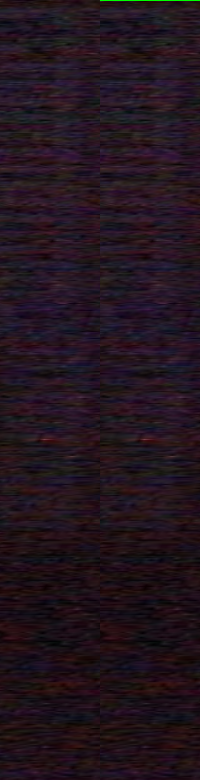

bottom/2022/03/01/2022-03-01T23:53:28+0000.jpg
0
too dark


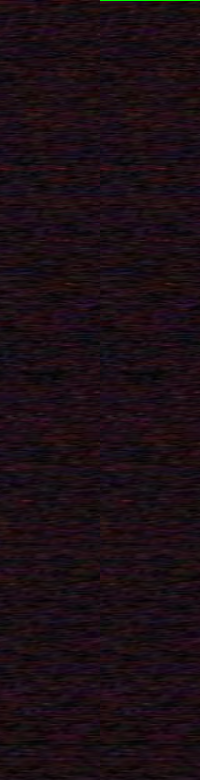

In [12]:
files = sorted(glob.glob('bottom/2022/03/01/*.jpg'))

match = {}
pix = []
h = []
with open('mapping.txt', 'r') as f:
    for line in f:
        a = line.strip().split(',')
        match[int(a[0])] = int(a[1])
        pix.append(int(a[0]))
        h.append(int(a[1]))
print(match)


# files = ['bottom/2022/03/04/2022-03-04T17:23:03+0000.jpg']
c = 0
for i in files:
    c += 1
    print(i)
    image = cv2.imread(i)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    pts1 = np.float32([[448, 280],[500,800],[520,800],[470,280]])
    pts2 = np.float32([[0,0],[0,600],[100,600],[100,0]])
    M = cv2.getPerspectiveTransform(pts1, pts2)
    dst = cv2.warpPerspective(image, M, (100, 780))
    


    hsv = cv2.cvtColor(dst, cv2.COLOR_RGB2HSV)
    s = hsv[:,:,1]
    v = hsv[:,:,2]
    avgs = np.average(s[300,:])
    avgv = np.average(v[300,:])


    if avgv < 170 and avgs > 20:
        filtersize = (40,40)
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filtersize)
        graydst = cv2.cvtColor(dst, cv2.COLOR_RGB2GRAY)
        tophat_image = cv2.morphologyEx(graydst, cv2.MORPH_TOPHAT, kernel)

        ret,new_tophat_image = cv2.threshold(tophat_image,45,255,cv2.THRESH_BINARY)

        kernel2 = np.ones((4,4), np.int8)
        closing = cv2.morphologyEx(new_tophat_image, cv2.MORPH_CLOSE, kernel2)
    else:
        graydst = cv2.cvtColor(dst, cv2.COLOR_RGB2GRAY)
        
        ret,new_tophat_image = cv2.threshold(graydst,85,255,cv2.THRESH_BINARY)

        kernel2 = np.ones((4,4), np.int8)
        closing = cv2.morphologyEx(new_tophat_image, cv2.MORPH_CLOSE, kernel2)
        

    wp = []
    for i in range(len(closing)):
        p = 0
        for j in range(len(closing[0])):
            if closing[i][j] == 0:
                p += 1
        wp.append(p)

    target = 0
    for i in range(len(wp)):
        if wp[i] > 90:
            print(i)
            target = i
            break

    if target == 0 or target >= 600:
        print('too dark')

        line = cv2.line(dst.copy(), (0,target), (100,target), (0,255,0), 1)
        hey = Image.new('RGB', (200, 780))
        hey.paste(Image.fromarray(dst), (0,0))
        hey.paste(Image.fromarray(line), (100, 0))
        display(hey)

        continue

    # if c == 38:
    #     a = Image.fromarray(image)
    #     display(a)
        # line = cv2.line(dst.copy(), (0,target), (100,target), (0,255,0), 1)
        # hey = Image.new('RGB', (200, 780))
        # hey.paste(Image.fromarray(dst), (0,0))
        # hey.paste(Image.fromarray(line), (100, 0))
        # display(hey)




    hh = 0
    lh = 0
    measure = 0
    current = 0
    flag = False
    for i in range(len(pix)-1):
        if target == pix[i]:
            current = h[i]
            flag = True
        elif target == pix[i+1]:
            current = h[i+1]
            flag = True
        elif target < pix[i] and target > pix[i+1]:
            hh = pix[i]
            lh = pix[i+1]
            measure = h[i]
            print(pix[i], pix[i+1], h[i])
    if flag == True:
        print('current height:', current)
        flag = False
    else:
        print('current height:', 10/(hh-lh)*(hh-target) + measure)

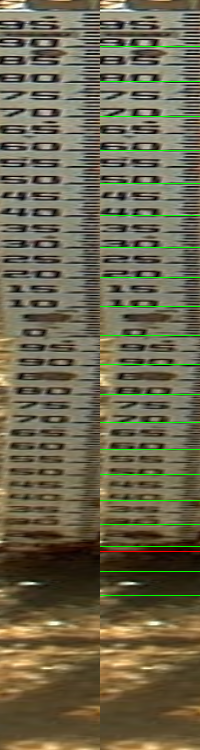

In [59]:
test = cv2.line(dst.copy(), (0,target), (100,target), (255,0,0), 1)
test = cv2.line(test.copy(), (0,595), (100,595), (0,255,0), 1)   # 0
test = cv2.line(test.copy(), (0,571), (100,571), (0,255,0), 1)   # 10
test = cv2.line(test.copy(), (0,546), (100,546), (0,255,0), 1)     # 20
test = cv2.line(test.copy(), (0,524), (100,524), (0,255,0), 1)     #30
test = cv2.line(test.copy(), (0,500), (100,500), (0,255,0), 1)     # 40
test = cv2.line(test.copy(), (0,474), (100,474), (0,255,0), 1)     # 50
test = cv2.line(test.copy(), (0,449), (100,449), (0,255,0), 1)     # 60
test = cv2.line(test.copy(), (0,422), (100,422), (0,255,0), 1)     # 70
test = cv2.line(test.copy(), (0,394), (100,394), (0,255,0), 1)     # 80
test = cv2.line(test.copy(), (0,364), (100,364), (0,255,0), 1)     # 90
test = cv2.line(test.copy(), (0,335), (100,335), (0,255,0), 1)     # 100
test = cv2.line(test.copy(), (0,306), (100,306), (0,255,0), 1)     # 110
test = cv2.line(test.copy(), (0,277), (100,277), (0,255,0), 1)     # 120
test = cv2.line(test.copy(), (0,247), (100,247), (0,255,0), 1)     # 130
test = cv2.line(test.copy(), (0,215), (100,215), (0,255,0), 1)     # 140
test = cv2.line(test.copy(), (0,183), (100,183), (0,255,0), 1)     # 150
test = cv2.line(test.copy(), (0,150), (100,150), (0,255,0), 1)     # 160
test = cv2.line(test.copy(), (0,116), (100,116), (0,255,0), 1)     # 170
test = cv2.line(test.copy(), (0,81), (100,81), (0,255,0), 1)     # 180
test = cv2.line(test.copy(), (0,46), (100,46), (0,255,0), 1)     # 190

hey = Image.new('RGB', (200, 750))
hey.paste(Image.fromarray(dst), (0,0))
hey.paste(Image.fromarray(test), (100, 0))
display(hey)

[594.84597523 570.83567961 546.07897667 520.5758664  494.32634881
 467.33042389 439.58809164 411.09935207 381.86420518 351.88265096
 321.15468942 289.68032055 257.45954435 224.49236083 190.77876999
 156.31877182 121.11236632  85.1595535   48.46033335  11.01470588]


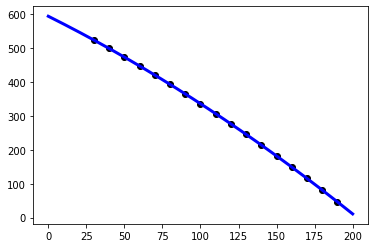

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

pix = [524,500,474,449,422,394,364,335,306,277,247,215,183,150,116,81,46]
h = [30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190]

poly = PolynomialFeatures(degree=2)
hh = np.asarray(h).reshape(-1,1)
xtrain = poly.fit_transform(hh)
clf = LinearRegression()
clf.fit(xtrain, pix)
ynew = clf.predict(xtrain)

xnewmin = 0
xnewmax = 200

x_new = np.linspace(xnewmin, xnewmax, 20).reshape(-1,1)
x_new_trans = poly.fit_transform(x_new)

y_new = clf.predict(x_new_trans)

print(y_new)

plt.scatter(h, pix, color="black")
plt.plot(x_new, y_new, color="blue", linewidth=3)
plt.show()